[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mktmi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


SVM Accuracy: 0.47772194304857624
              precision    recall  f1-score   support

           0       0.48      0.42      0.45      1504
           1       0.48      0.54      0.51      1481

    accuracy                           0.48      2985
   macro avg       0.48      0.48      0.48      2985
weighted avg       0.48      0.48      0.48      2985



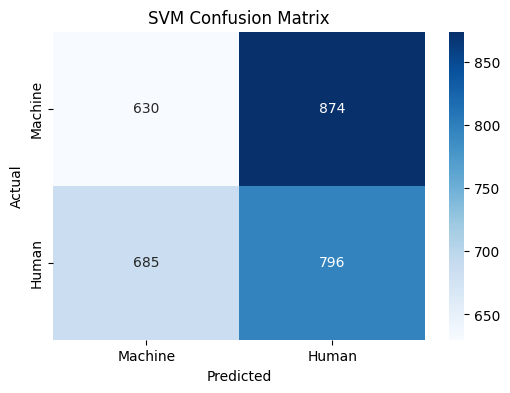

In [11]:
# Import necessary libraries
import pandas as pd
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import pickle
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Download stopwords if not already downloaded
nltk.download('stopwords')

# Load dataset
df = pd.read_csv(r'C:\Users\mktmi\Documents\ironhack\AI_Engineering\Work\Week4\project-3-nlp\TRAINING_DATA.txt', delimiter='\t', header=None, names=['label', 'text'])

# Check and clean dataset
df.dropna(subset=['text', 'label'], inplace=True)

# Preprocess text (lowercasing, removing punctuation, and stopwords)
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    stop_words = set(stopwords.words('spanish'))  # Assuming Spanish text
    return ' '.join([word for word in text.split() if word not in stop_words])

df['cleaned_text'] = df['text'].apply(preprocess_text)

# Vectorize text using TF-IDF
tfidf = TfidfVectorizer(max_features=1000)
X = tfidf.fit_transform(df['cleaned_text'])
y = df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SVM model with a linear kernel
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model's performance
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

# Save the SVM model and the TF-IDF vectorizer for future use
with open('svm_model.pkl', 'wb') as f:
    pickle.dump(svm_model, f)

with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

# Confusion Matrix to visualize performance
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Machine', 'Human'], yticklabels=['Machine', 'Human'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()
